## Topic: Uber data analysis¶
#### Author: Hashmita Mundhda
#### Programming language: Python3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data 
df = pd.read_csv('./Downloads/Uber_data_analysis/Uber_request_data.csv')

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
#describe the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Cleaning & Transformation Dataset

In [5]:
#Checking out columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [6]:
#Bringing consistency to data columns
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [7]:
#Learning about data
def data_info(df):
  print(df.shape)
  print('\n*********************************')
  print(df.describe().transpose())
  print('\n *********************************')
  print(df.info())

data_info(df)

(6745, 6)

*********************************
             count         mean          std  min     25%     50%     75%  \
request_id  6745.0  3384.644922  1955.099667  1.0  1691.0  3387.0  5080.0   
driver_id   4095.0   149.501343    86.051994  1.0    75.0   149.0   224.0   

               max  
request_id  6766.0  
driver_id    300.0  

 *********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   request_id         6745 non-null   int64  
 1   pickup_point       6745 non-null   object 
 2   driver_id          4095 non-null   float64
 3   status             6745 non-null   object 
 4   request_timestamp  6745 non-null   object 
 5   drop_timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None


In [8]:
# Looking deeper into data entries to find inconsistency

objects = df.dtypes[df.dtypes == "object"].index
df[objects].describe().transpose()

,count,unique,top,freq
pickup_point,6745,2,City,3507
status,6745,3,Trip Completed,2831
request_timestamp,6745,5618,11/7/2016 19:02,6
drop_timestamp,2831,2598,11/7/2016 13:00,4


In [9]:
#Learning about data unique values
def unique_info(df):
  print(df.columns.unique())
  print('\n*********************************')
  print(df.pickup_point.unique())
  print('\n *********************************')
  print(df.status.unique())

unique_info(df)

Index(['request_id', 'pickup_point', 'driver_id', 'status',
       'request_timestamp', 'drop_timestamp'],
      dtype='object')

*********************************
['Airport' 'City']

 *********************************
['Trip Completed' 'Cancelled' 'No Cars Available']


In [10]:
#Checking for null values
def null_values(df):
    print("Pick up point:", df['pickup_point'].isnull().values.any())
    print("Status:", df['status'].isnull().values.any())
    print("Driver Id:", df['driver_id'].isnull().values.any())
    print("Request Id:",df['request_id'].isnull().values.any())
    print("Drop timestamp:", df['drop_timestamp'].isnull().values.any())
    print("Request Tiestamp:", df['request_timestamp'].isnull().values.any())
    print("********************")
    print(df.isnull().sum())
    

null_values(df)

Pick up point: False
Status: False
Driver Id: True
Request Id: False
Drop timestamp: True
Request Tiestamp: False
********************
request_id              0
pickup_point            0
driver_id            2650
status                  0
request_timestamp       0
drop_timestamp       3914
dtype: int64


In [11]:
# Replacing NAN values
df['driver_id'].fillna('Unknown', inplace = True)

In [12]:
#describe the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   request_id         6745 non-null   int64 
 1   pickup_point       6745 non-null   object
 2   driver_id          6745 non-null   object
 3   status             6745 non-null   object
 4   request_timestamp  6745 non-null   object
 5   drop_timestamp     2831 non-null   object
dtypes: int64(1), object(5)
memory usage: 316.3+ KB


In [13]:
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'], format='mixed')
df['drop_timestamp'] = pd.to_datetime(df['drop_timestamp'], format='mixed')

In [14]:
print('There are '+str(len(df['request_id'].unique()))+' unique request ids')

There are 6745 unique request ids


In [15]:
#request id is of no use for the analysis, lets remove this column
df.drop('request_id',axis=1,inplace=True)

##### It is observed that there are missing values for columns driver id and drop timestamp, lets analyze those first
##### * Assumption is driver id is null for all the rides which are 'No Cars Available' status
##### * Drop time is null for all the records with 'Cancelled' status

In [16]:
df.groupby(['status']).count()

,pickup_point,driver_id,request_timestamp,drop_timestamp
status,,,,
Cancelled,1264,1264,1264,0
No Cars Available,2650,2650,2650,0
Trip Completed,2831,2831,2831,2831


#### From the above table it is evident that the assumptions are correct and functionally we don't have any missing values

### Univariate Analysis

In [17]:
df.describe()

,request_timestamp,drop_timestamp
count,6745,2831
mean,2016-09-04 08:49:18.446849536,2016-09-05 17:03:26.523843072
min,2016-07-13 00:00:24,2016-07-13 00:01:12
25%,2016-07-14 07:38:26,2016-07-14 08:10:24.500000
50%,2016-07-15 13:44:15,2016-07-15 15:27:41
75%,2016-11-07 19:00:00,2016-11-07 19:25:30
max,2016-12-07 23:54:00,2016-12-07 23:45:00


##### It is clear that the driver ids are uniformly distributed thus we have almost equal number of rides or requests for all the 300 drivers.

In [18]:
df.status.value_counts()*100/df.status.count()

status
Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: count, dtype: float64

##### More than half of the requests are not getting fulfilled by uber.

In [19]:
#lets add some more columns for better understanding derived from timestamps
df['r_date'] = df['request_timestamp'].dt.date
df['r_time'] = df['request_timestamp'].dt.time
df['d_date'] = df['drop_timestamp'].dt.date
df['d_time'] = df['drop_timestamp'].dt.time
df['r_hour'] = df['request_timestamp'].dt.hour.astype(int)
day_of_week = {0:'Mon',1:'Tue',2:'Wed',3:'Thr',4:'Fri',5:'Sat',6:'Sun'}
# define bins and labels
bins = ['00:00:00', '03:00:00', '11:00:00','15:00:00', '17:00:00', '23:59:59']
labels = ['Late Night', 'Early Morning', 'Mid-Day','Evening', 'Late Evening']
df['dayofweek'] = df['request_timestamp'].dt.dayofweek.map(day_of_week)
df['timeofday'] = pd.cut(pd.to_timedelta(df['request_timestamp'].dt.time.astype(str)), bins=pd.to_timedelta(bins), labels=labels, ordered=False)

In [20]:
#drop the columns which are not required for analysis
df.drop(['request_timestamp','drop_timestamp','d_time','r_time'],axis=1,inplace=True)

In [21]:
df.head()

,pickup_point,driver_id,status,r_date,d_date,r_hour,dayofweek,timeofday
0,Airport,1.0,Trip Completed,2016-11-07,2016-11-07,11,Mon,Mid-Day
1,Airport,1.0,Trip Completed,2016-11-07,2016-11-07,17,Mon,Late Evening
2,City,1.0,Trip Completed,2016-12-07,2016-12-07,9,Wed,Early Morning
3,Airport,1.0,Trip Completed,2016-12-07,2016-12-07,21,Wed,Late Evening
4,City,1.0,Trip Completed,2016-07-13,2016-07-13,8,Wed,Early Morning


##### We have derived some new columns i.e r_date,d_date, dayofweek and timeofday

#### Now, our focus shifts to trips that remain unfinished. Let's conduct a detailed investigation to uncover any underlying issues

In [22]:
df_new = df[df['status']!='trip_completed']
len(df_new)

6745

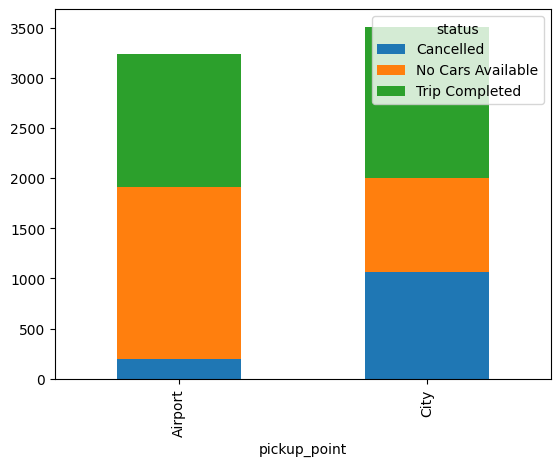

In [23]:
#by pickup points
df_temp = df_new.groupby(['status','pickup_point']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(df_temp, values ='pickup_point',index=['pickup_point'],columns =['status']).plot(kind='bar',stacked=True)
plt.show()

In [24]:
display(df_temp)

,pickup_point,r_date
status,,
Cancelled,Airport,198
Cancelled,City,1066
No Cars Available,Airport,1713
No Cars Available,City,937
Trip Completed,Airport,1327
Trip Completed,City,1504


#### Observations
##### 1. There are more cancelled trips when rides are from City to Airport
##### 2. There are more Not cabs found, when rides are from Airport to City

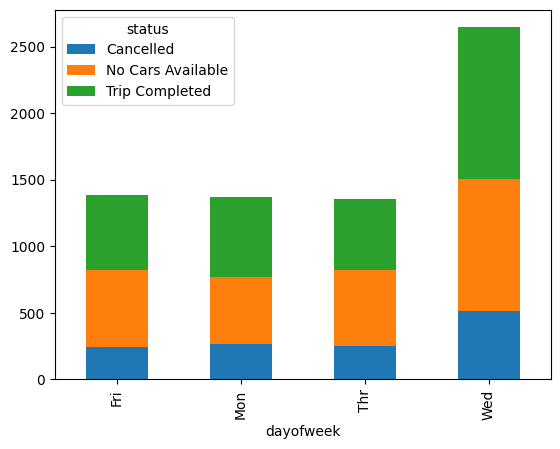

In [25]:
#by dayofweek
df_temp = df_new.groupby(['status','dayofweek']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(df_temp, values ='dayofweek',index=['dayofweek'],columns =['status']).plot(kind='bar',stacked=True)
plt.show()

##### Finally, we've discovered a significant increase in cancellations and unavailability of cabs specifically on Wednesdays.

#### Let's analyze ride requests specifically for Wednesdays, focusing on trips that were not successfully completed, in order to gain valuable insights.

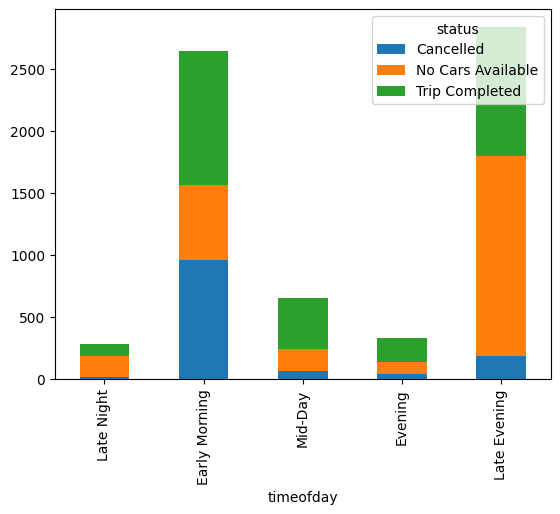

In [26]:
#by timeofday
df_temp = df_new.groupby(['status','timeofday']).agg({'r_date':'count'}).reset_index(level=1)
pd.pivot_table(df_temp, values ='timeofday',index=['timeofday'],columns =['status']).plot(kind='bar',stacked=True)
plt.show()

#### Clearly, early morning and late evenings should be our area of concerns which needs more detailing further.
##### 1. Late evenings(5 PM - 12 AM), we have a surge in no cars available
##### 2. Early mornings(3 AM - 11 AM), cancellation is more than no cars available

#### Findings by Univariate analysis
##### 1. Approx 60% of the rides are not being completed. It is a pressing issue for business
##### 2. Rides from airport to city suffers from 'No cars Available' more than city to airport
##### 3. As per the provided sample, it seems there is something happening on wednesday. It needs more attention
##### 4. Late evenings(5 PM - 12 AM), we have a surge in no cars available
##### 5. Early mornings(3 AM - 11 AM), cancellation is more than no cars available

#### Bivariate Analysis

In [27]:
# lets validate our finding number 2
df_temp = df_new.groupby(['dayofweek','status','pickup_point']).agg({'r_date':'count'}).reset_index(level=0)
df_temp.sort_values('r_date',ascending=False)

dayofweek  r_date
status            pickup_point                  
No Cars Available Airport            Wed     667
Trip Completed    Airport            Wed     587
                  City               Wed     552
Cancelled         City               Wed     417
No Cars Available Airport            Thr     378
Trip Completed    City               Thr     339
No Cars Available Airport            Mon     338
                  Airport            Fri     330
                  City               Wed     328
Trip Completed    City               Mon     320
                  City               Fri     293
                  Airport            Mon     281
                  Airport            Fri     268
No Cars Available City               Fri     250
Cancelled         City               Mon     220
                  City               Thr     220
                  City               Fri     209
No Cars Available City               Thr     193
Trip Completed    Airport            Thr     191
No Cars Available City               Mon     166
Cancelled         Airport            Wed      93
                  Airport            Mon      42
                  Airport            Thr      32
                  Airport            Fri      31

In [28]:
#lets validate our finding number 2
df_temp = df_new.groupby(['timeofday','status','pickup_point']).agg({'r_date':'count'}).reset_index(level=0)
df_temp.sort_values('r_date',ascending=False)

timeofday  r_date
status            pickup_point                       
No Cars Available Airport        Late Evening    1457
Cancelled         City          Early Morning     924
Trip Completed    City          Early Morning     597
                  City           Late Evening     526
                  Airport        Late Evening     515
No Cars Available City          Early Morning     503
Trip Completed    Airport       Early Morning     486
                  City                Mid-Day     228
                  Airport             Mid-Day     186
No Cars Available City           Late Evening     154
                  City                Mid-Day     123
Cancelled         Airport        Late Evening     109
Trip Completed    City                Evening     103
No Cars Available Airport       Early Morning      99
Trip Completed    Airport             Evening      88
No Cars Available City             Late Night      85
                  Airport          Late Night      84
Cancelled         City           Late Evening      79
No Cars Available City                Evening      72
Trip Completed    Airport          Late Night      51
No Cars Available Airport             Mid-Day      51
Trip Completed    City             Late Night      50
Cancelled         Airport       Early Morning      34
                  City                Mid-Day      33
                  Airport             Mid-Day      30
                  Airport             Evening      25
No Cars Available Airport             Evening      22
Cancelled         City                Evening      18
                  City             Late Night      12
                  Airport          Late Night       0

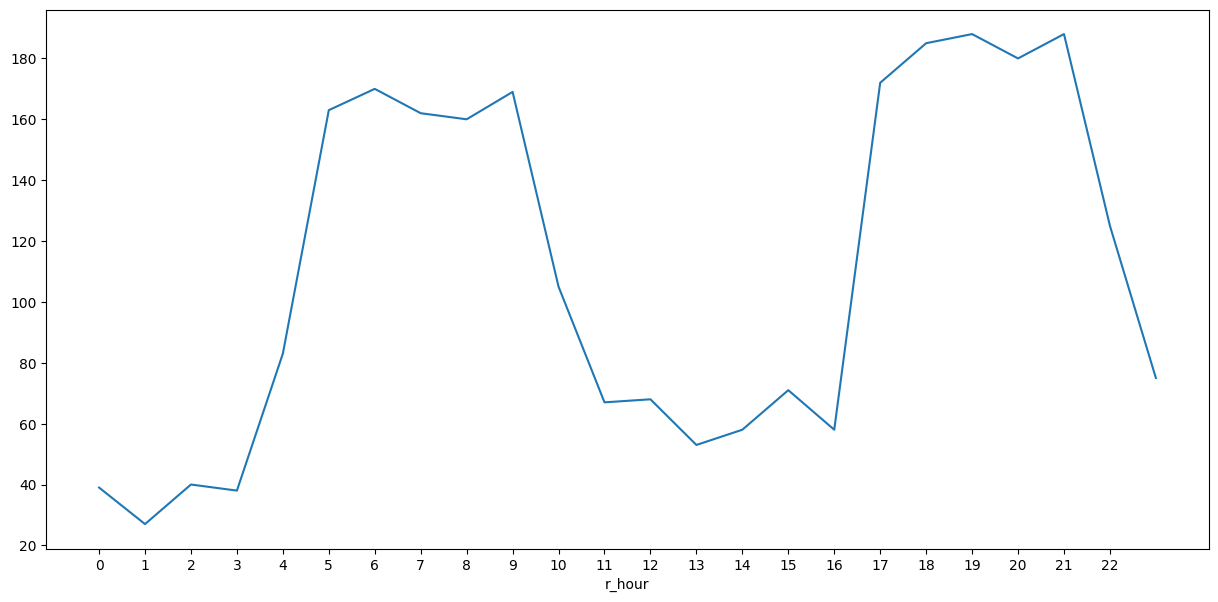

In [29]:
plt.figure(figsize=(15,7)) 
plt.xticks(np.arange(0, 23, 1.0))
keys = list(range(0,24))
df_new[df_new['dayofweek']=='Wed']['r_hour'].value_counts().sort_index().plot()
plt.show()

##### The graph clearly illustrates that on Wednesdays, there is a noticeable surge in 'Cabs not available' and 'Cancelled' ride incidents during two key time periods: from 3 AM to 11 AM and from 4 PM to 12 AM

#### Key Recommendations:

##### 1. Increase Supply on Wednesdays and Late Evenings:
###### Address the issue of 'No Cabs Available' on Wednesdays and during late evening hours by boosting ride supply. The data shows peak 'Cabs not available' and 'Cancelled' rides between 3 AM - 11 AM and 4 PM - 12 AM.
##### 2. Mitigate Early Morning Cancellations to the Airport:
###### To tackle early morning ride cancellations from the city to the airport, investigate and address the reasons behind driver reluctance. This may include incentivizing return trips for drivers in the morning.
##### 3. Leverage Flight Schedules on Wednesdays:
###### Explore opportunities to meet the high demand on Wednesdays during early mornings and late nights, potentially linked to flight schedules. Analyze data to pinpoint specific high-demand timeframes and consider offering bonuses or incentives to drivers for airport-to-city and city-to-airport trips during those hours.